## Introduction

In this notebook we will use classic statistical techniques such as linear regression to explore the fundamentals of fitting a model. We will start with problems involving regression and classification in low dimensional spaces (1D or 2D spaces that can be visualized easily) and then get a glimse of how to think about problems in higher dimensions. We will try to build intuitions that can help us model more complicated data such as human speech, pictures, and robinhood users.

## Linear regression

Lets take a look at a problem where two variables are linearly related to each other. An example of such a dataset can be temperature records in Celcius and Fahrenheit. Say you dont know the exact formula for converting temperature from Celcius to Fahrenheit, how can you figure out the formula by yourself? We can use linear regression to learn this relationship from data. Lets collect this data by going to several weather websites that give us temperature in both units. The cell below shows data collected by me on July 22nd 2017 from the website https://www.wunderground.com/. 

In [8]:
temperatures = [
    {"city": "San Francisco", "celcius": 23.6, "fahrenheit": 74.2},
    {"city": "New York", "celcius": 31.6, "fahrenheit": 88.9},
    {"city": "Chicago", "celcius": 29.3, "fahrenheit": 84.7},
    {"city": "Houston", "celcius": 34.2, "fahrenheit": 94.8},
]

Lets convert this python dictionary into a data frame that can be manipulated easily by us

In [19]:
import pandas as pd
data = pd.DataFrame(temperatures)

In [20]:
# The variable data stores a table as shown below
data

,celcius,city,fahrenheit
0,23.6,San Francisco,74.2
1,31.6,New York,88.9
2,29.3,Chicago,84.7
3,34.2,Houston,94.8


I will switch between python and R to perform different tasks. I am more familiar with R for statistical modeling and visualization, while I use python as my programming language of choice for building complex application and for writing small scripts to prepare data. Jupyter makes this switching between languages really easy

In [10]:
# This enables the magic switching between R and python
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


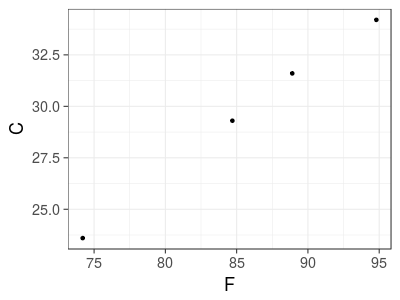

In [16]:
%%R -w 400 -h 300 -i data
library("ggplot2")

p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + theme_bw(base_size=18) + xlab(TeX("F")) + ylab(TeX("C"))
print(p)

The figure above clearly shows that the relationship between C and F is linear. A linear relationship can be represented by an equation of the form $\hat{C}_i = \alpha + \beta \cdot F_i$. The term $\hat{C}_i$ represents the predicted value of $C_i$, this is generally pronounced `c hat`. The subscript $i$ represents the $i^\text{th}$ sample in the training set. The terms $\alpha$ and $\beta$ are tunable parameters that are learned from the data.

Different values of $\alpha$ and $\beta$ leads to different prediction of C from a given F. We chose the value of $\alpha$ and $\beta$ that minimizes the sum of prediction error ($(C_i - \hat{C}_i)^2$) over each sample in our dataset. This process of finding $\alpha$, and $\beta$ that minimizes the prediction error is called learning parameters from data, or learning in short.

We can learn these parameters using different techniques. The classical method of solving this equation is called least squares method. It is easy to derive this method if we view the equation $\hat{C_i} = \alpha + \beta \cdot F$ differently. The equation states that
$$ \hat{C}_1 = \alpha + \beta \cdot F_1$$
$$ \hat{C}_2 = \alpha + \beta \cdot F_2$$
$$ \hat{C}_3 = \alpha + \beta \cdot F_3$$
$$ \hat{C}_4 = \alpha + \beta \cdot F_4$$

This is equivalent to the following matrix equation
$$
\begin{bmatrix}
\hat{C}_1\\
\hat{C}_2\\
\hat{C}_3\\
\hat{C}_4\\
\end{bmatrix}
=
\begin{bmatrix}
1 & F_1 \\
1 & F_2 \\
1 & F_3 \\
1 & F_4 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix}
$$
or
$$\mathbf{\hat{C} = F \cdot W}$$
Now we want to minimize the error($e$) where $e = \mathbf{(C - \hat{C})^T \cdot (C - \hat{C})}$. From basic calculus we know that to find the parameter $W$ that minimizes the error $e$ we set $\frac{\partial e}{\partial W} = 0$.
$$
\begin{align}
\frac{\partial e}{\partial W} &= 0\\
\frac{\partial e}{\partial \hat{C}} \cdot \frac{\partial \hat{C}}{\partial W} &= 0\\
(C - \hat{C})^T \cdot F &= 0\\
F^T \cdot (C - \hat{C}) &= 0\\
F^T \cdot \hat{C} &= F^T \cdot C\\
F^T \cdot F \cdot W &= F^T \cdot C\\
W &= (F^T \cdot F)^{-1} \cdot F^T \cdot C\\
\end{align}
$$

In [23]:
%%R -i data
model = lm(celcius ~ fahrenheit, data=data)
print(summary(model))


Call:
lm(formula = celcius ~ fahrenheit, data = data)

Residuals:
      0       1       2       3 
-0.1258  0.2364  0.1186 -0.2291 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -14.82674    1.50287  -9.866  0.01012 * 
fahrenheit    0.51958    0.01748  29.725  0.00113 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2629 on 2 degrees of freedom
Multiple R-squared:  0.9977,	Adjusted R-squared:  0.9966 
F-statistic: 883.6 on 1 and 2 DF,  p-value: 0.00113



This shows that $\hat{C} = -14.82674 + 0.51958 \cdot F$. We can check how good this prediction is by plotting the predicted linear relationship along side our data

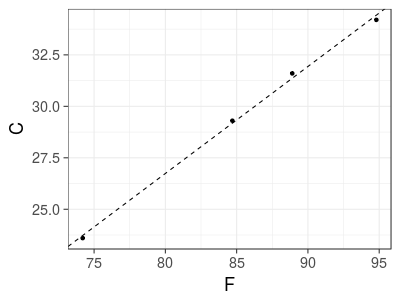

In [31]:
%%R -w 400 -h 300 -i data
p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + geom_abline(intercept=-14.82674, slope=0.51958, linetype="dashed")
p = p + theme_bw(base_size=18) + xlab(TeX("F")) + ylab(TeX("C"))
print(p)

The prediction by our equation $\hat{C} = -14.82674 + 0.51958 * F$ is really good and fits the data quite well. Though the prediction is good, it is not quite perfect and we can see some small errors. These errors may arise due to the fact that reported temperatures on websites are rounded to one decimal place and this contain some rounding error from the start.

The true relationship between Celcius and Fahrenheit is well known and a quick google search shows us that the true relationship is $C = -32 \cdot \frac{5}{9} + \frac{5}{9} \cdot F$. Lets see how close our prediction is to this true relationship.

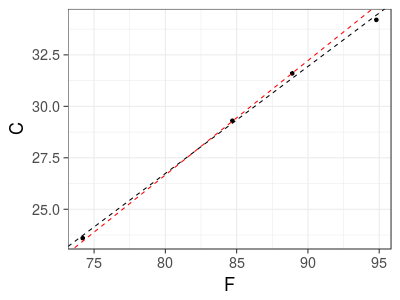

In [32]:
%%R -w 400 -h 300 -i data
p = ggplot(data)
p = p + geom_point(aes(x=fahrenheit, y=celcius))
p = p + geom_abline(intercept=-14.82674, slope=0.51958, linetype="dashed")
p = p + geom_abline(intercept=-32 * 5 / 9, slope=5 / 9, linetype="dashed", color="red")
p = p + theme_bw(base_size=18) + xlab(TeX("F")) + ylab(TeX("C"))
print(p)